<a href="https://colab.research.google.com/github/Milenavila/Challenge_Telecom_x-/blob/main/Challenge_Telecom_x_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción**

El presente informe busca recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa acerca de la evasión de clientes en los contratos en telecomunicaciones de la Empresa Telecom.  A partir del siguiente  análisis, se  podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

Para ello clasificaremos el informe en 4 grandes momentos que son:

<ol>
  <li> Limpieza y Tratamiento de Datos</li>
  <li> Análisis Exploratorio de Datos</li>
  <li> Conclusiones e Insights:
        Resumén de los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.</li>
  <li> Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.</li>



In [273]:
import pandas as pd
import numpy as np



In [126]:
df = pd.read_json('/content/drive/MyDrive/Challenge_Telecom_X/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# **1. Limpieza y tratamiento de datos**

In [127]:
df.head()




,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [128]:
# Estructura general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [129]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


####**Normalizar las columnas donde estan los diccionarios


In [130]:
df_customer = pd.json_normalize(df['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [131]:
df_phone = pd.json_normalize(df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [132]:
df_internet = pd.json_normalize(df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [133]:
df_account= pd.json_normalize(df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [134]:
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [135]:
df_final.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [136]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [137]:
cols_bool = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in cols_bool:
    df_final[col] = df_final[col].map({'Yes': True, 'No': False})
    df_final[col] = df_final[col].astype(bool)


In [138]:
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(bool)

In [139]:
df_final['MultipleLines'] = df_final['MultipleLines'].map({'Yes': True, 'No': False, 'No phone service': False})
df_final['MultipleLines'] = df_final['MultipleLines'].astype(bool)

In [140]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [141]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [142]:
df_final['customerID'].duplicated().sum()


np.int64(0)

In [143]:
df_final['customerID'].nunique()

7267

In [144]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [145]:
df_final['Churn'] = df_final['Churn'].astype(str).str.strip()
df_final['Churn'] = df_final['Churn'].replace('', np.nan)
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [146]:
df_final = df_final.dropna(subset=['Churn'])
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [147]:
df_final['Churn'] = df_final['Churn'].map({'Yes': True, 'No': False})
df_final['Churn'].value_counts()

/tmp/ipython-input-147-931472461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': True, 'No': False})


,count
Churn,
False,5174
True,1869


In [148]:
df_final['Churn'].astype(np.bool)
df_final['Churn']


,Churn
0,False
1,False
2,True
3,True
4,True
...,...
7262,False
7263,True
7264,False
7265,False


In [149]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 
 17  

In [150]:
df_final['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [151]:
df_final['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
False,5901
True,1142


In [152]:
df_final['Partner'].value_counts()

,count
Partner,
False,3641
True,3402


In [153]:
df_final['Dependents'].value_counts()

,count
Dependents,
False,4933
True,2110


In [154]:
df_final['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [155]:
df_final['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8
...,...
829.55,1
625.65,1
462.8,1


In [156]:
df_final.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



## **Detectar espacios vacíos**

In [157]:
df_final['Charges.Total'] = df_final['Charges.Total'].astype(str)

/tmp/ipython-input-157-3805829942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].astype(str)


In [158]:
df_final['Charges.Total'] = df_final['Charges.Total'].apply(lambda x: x.strip())


/tmp/ipython-input-158-2723979316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].apply(lambda x: x.strip())


In [159]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'].str.strip(), errors='coerce')

/tmp/ipython-input-159-3053346819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'].str.strip(), errors='coerce')


In [160]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 
 17  

In [161]:
cols_category = ['InternetService', 'Contract', 'PaymentMethod']

for col in cols_category:
    df_final[col] = df_final[col].astype('category')


/tmp/ipython-input-161-3792519485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype('category')
/tmp/ipython-input-161-3792519485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype('category')
/tmp/ipython-input-161-3792519485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [162]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   bool    
 2   gender            7043 non-null   object  
 3   SeniorCitizen     7043 non-null   bool    
 4   Partner           7043 non-null   bool    
 5   Dependents        7043 non-null   bool    
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   bool    
 8   MultipleLines     7043 non-null   bool    
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   bool    
 11  OnlineBackup      7043 non-null   bool    
 12  DeviceProtection  7043 non-null   bool    
 13  TechSupport       7043 non-null   bool    
 14  StreamingTV       7043 non-null   bool    
 15  StreamingMovies   7043 non-null   bool    
 16  Contract          7043 non-nu

In [163]:
df_final['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [164]:
df_final['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [165]:
df_final['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [166]:
df_final['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
True,3545
False,3498


In [167]:
df_final['OnlineBackup'].value_counts()

,count
OnlineBackup,
True,3955
False,3088


In [168]:
df_final[df_final['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,False,DSL,...,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,False,No,...,True,True,True,True,True,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,True,DSL,...,True,False,True,False,False,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,False,No,...,True,True,True,True,True,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,False,No,...,True,True,True,True,True,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,True,No,...,True,True,True,True,True,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,True,DSL,...,True,True,True,True,False,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,True,No,...,True,True,True,True,True,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,False,DSL,...,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,False,DSL,...,True,True,False,True,True,Two year,False,Mailed check,80.85,NaN


In [169]:
df_final = df_final.dropna(subset=['Charges.Total'])


In [170]:
df_final['Charges.Total'].isna().sum()

np.int64(0)

## **Creación de la columna Cuentas_Diarias**

In [171]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30
df_final.head()


/tmp/ipython-input-171-1454450542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [172]:
df_final['Cuentas_Diarias'].dtype

dtype('float64')

# **Análisis Exploratorio de los Datos**

  <p>Calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.
  </p>


In [173]:
df_final.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


In [174]:
df_final.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()


tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
False  5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
True   1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Monthly             ...                 Charges.Total  \
                count       mean  ...     75%     max         count   
Churn                             ...                                 
False          5163.0  61.307408  ...  88.475  118.75        5163.0   
True           1869.0  74.441332  ...  94.200  118.35        1869.0   

                                                                             
              mean          std    min      25%      50%       75%      max  
Churn                                                                        
False  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  8672.45  
True   1531.796094  1890.822994  18.85  134.500   703.55  2331.300  8684.80  

[2 rows x 24 columns]

# **Distribución de evasión**

<p>
  En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

</p>

/tmp/ipython-input-175-1237106527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', palette='pastel')


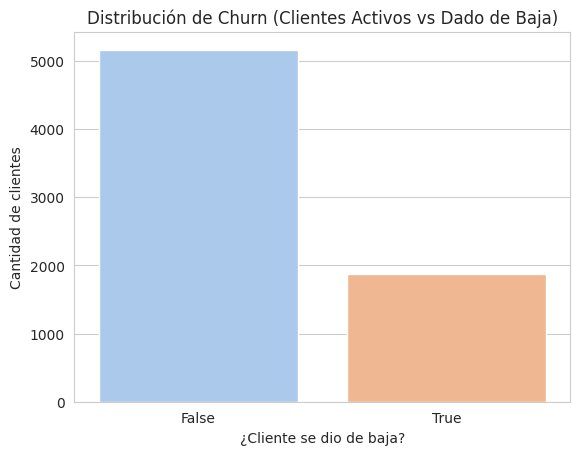

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(data=df_final, x='Churn', palette='pastel')
plt.title('Distribución de Churn (Clientes Activos vs Dado de Baja)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

<p>
  Para mostrar el porcentaje que representa cada grupo:
</p>

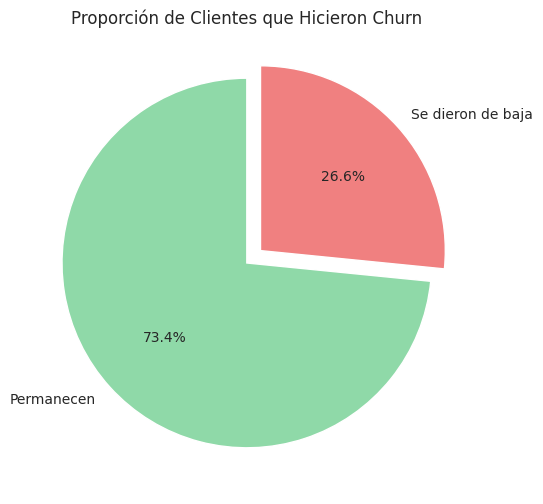

In [190]:
churn_counts = df_final['Churn'].value_counts()
labels = ['Permanecen', 'Se dieron de baja']
colors = ['#8fd9a8', '#f08080']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0, 0.1])
plt.title('Proporción de Clientes que Hicieron Churn')
plt.show()

<p>
  "El 26% de los clientes se han dado de baja, lo cual representa un nivel significativo de evasión. Este indicador alerta sobre la necesidad de comprender mejor los factores asociados al churn, para aplicar estrategias de retención efectivas. Además, al modelar este fenómeno, se debe considerar el leve desbalance en la variable objetivo."
</p>

## **Recuento de evasión por variables categóricas**
<p>

  Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

  Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

</p>


  <ul>
      <li>Distribución de Churn por género </li>
  </ul>


In [179]:
df_final['gender'].head()

,gender
0,Female
1,Male
2,Male
3,Male
4,Female


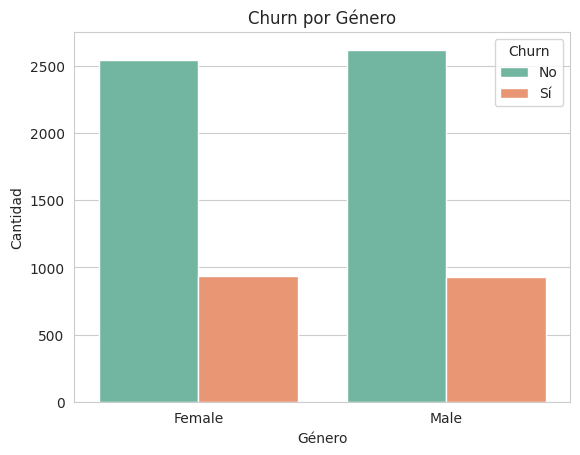

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_final, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Churn',labels=['No', 'Sí'])
plt.show()



In [183]:
df_final[['Churn', 'gender']].value_counts().reset_index(name='Cantidad')

,Churn,gender,Cantidad
0,False,Male,2619
1,False,Female,2544
2,True,Female,939
3,True,Male,930


<p>
  Del análisis de la variable gender frente a Churn, se observa que no hay diferencias significativas en la tasa de cancelación del servicio entre hombres y mujeres.

  Tanto los clientes identificados como female como los male presentan tasas de evasión muy similares, lo que indica que el género no es un factor determinante en la decisión de abandonar el servicio.
    
  Por lo tanto, en el diseño de estrategias para reducir el churn, no es necesario segmentar o priorizar acciones en función del género del cliente.

</p>




<ul>
  <li>Tipo de Contrato (Contract) vs Churn</li>

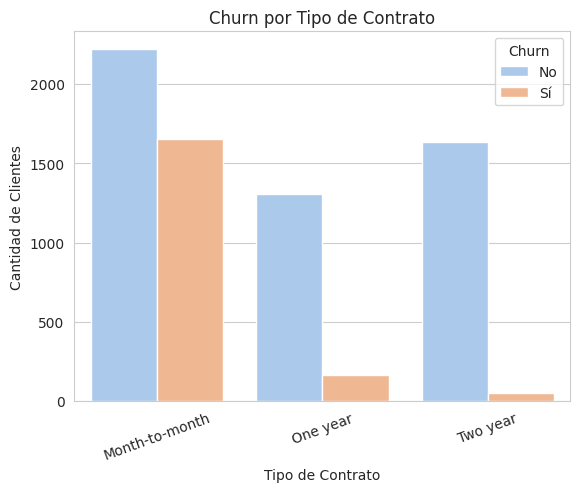

In [181]:
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

In [184]:
df_final[['Churn', 'Contract']].value_counts().reset_index(name='Cantidad')

,Churn,Contract,Cantidad
0,False,Month-to-month,2220
1,True,Month-to-month,1655
2,False,Two year,1637
3,False,One year,1306
4,True,One year,166
5,True,Two year,48


In [201]:
tabla_churn_contrato = pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100
tabla_churn_contrato = tabla_churn_contrato.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_contrato

Churn,No_Churn (%),Churn (%)
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


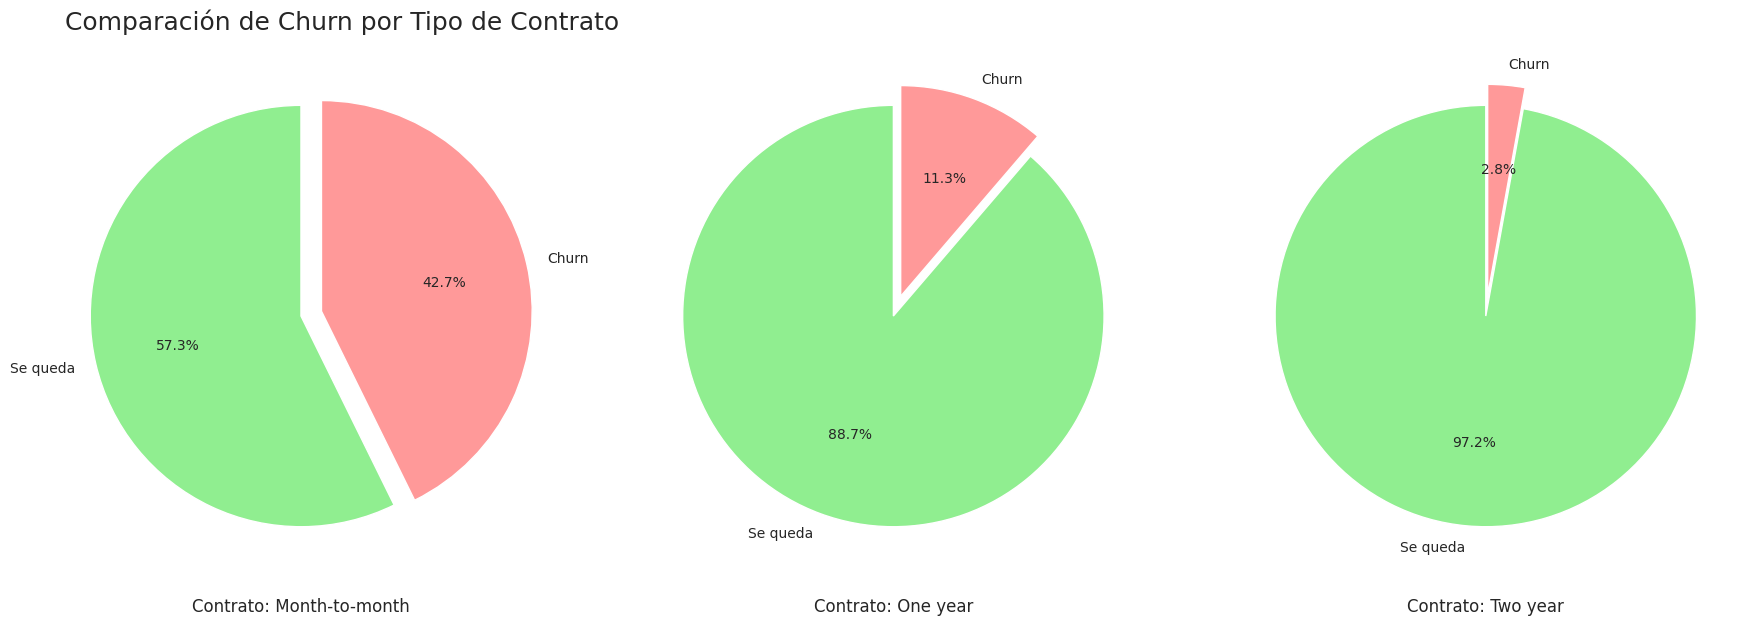

In [198]:
datos = {
    'Month-to-month': [57.29, 42.71],
    'One year': [88.72, 11.28],
    'Two year': [97.15, 2.85]
}

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (contrato, valores) in enumerate(datos.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'Contrato: {contrato}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Tipo de Contrato', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

<p>

  "Los clientes con contratos mensuales presentan una tasa de churn significativamente mayor, posiblemente por la facilidad de cancelación. Por tanto, estrategias de fidelización o beneficios por permanencia deberían enfocarse especialmente en este grupo."
</p>


<ul>
  <li>Método de Pago (PaymentMethod) vs Churn</li>

</ul>

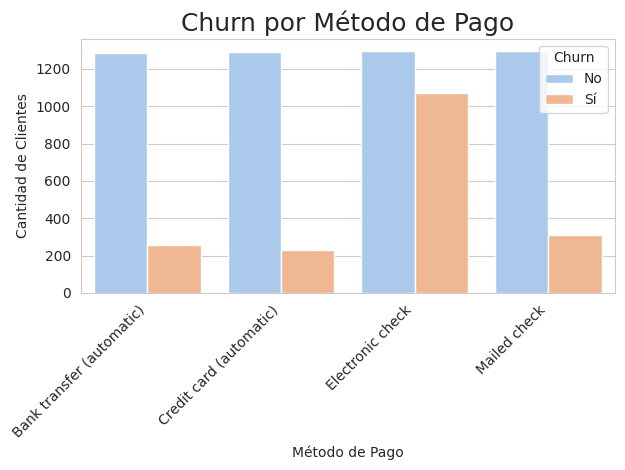

In [212]:
sns.countplot(data=df_final, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn por Método de Pago', fontsize=18)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

In [224]:
df_final[['Churn', 'PaymentMethod']].value_counts().reset_index(name='Cantidad')

,Churn,PaymentMethod,Cantidad
0,False,Mailed check,1296
1,False,Electronic check,1294
2,False,Credit card (automatic),1289
3,False,Bank transfer (automatic),1284
4,True,Electronic check,1071
5,True,Mailed check,308
6,True,Bank transfer (automatic),258
7,True,Credit card (automatic),232


In [204]:
tabla_churn_paymentmethod = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100
tabla_churn_paymentmethod = tabla_churn_paymentmethod.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_paymentmethod

Churn,No_Churn (%),Churn (%)
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


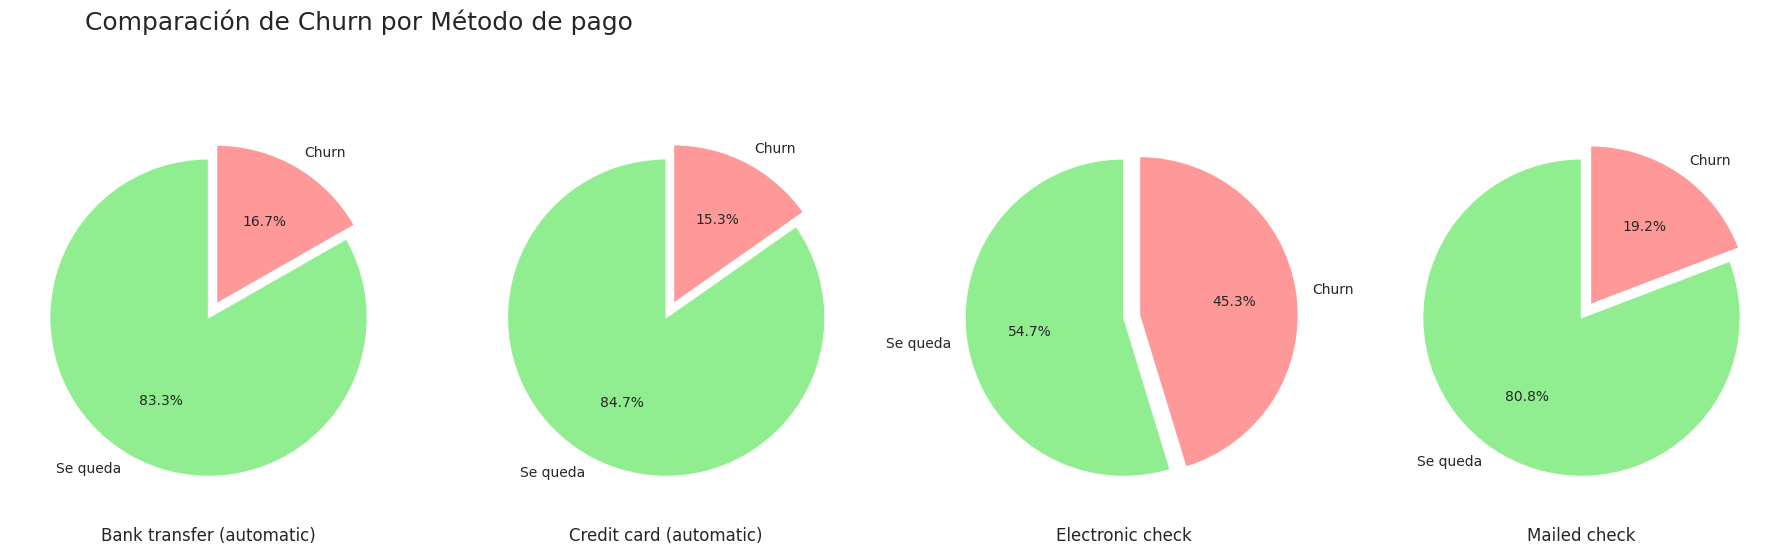

In [208]:
datos_1 = {
    'Bank transfer (automatic)': [83.26, 16.73],
    'Credit card (automatic)': [84.74, 15.25],
    'Electronic check': [54.71, 45.28],
    'Mailed check': [80.79, 19.20]
}

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

for i, (payment, valores) in enumerate(datos_1.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{payment}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Método de pago', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

<p>
  Por ejemplo, clientes que pagan por electronic check suelen tener más churn, según patrones comunes en telecomunicaciones.
</p>


In [211]:
df_final[['Churn', 'PaperlessBilling']].value_counts().reset_index(name='Cantidad')

,Churn,PaperlessBilling,Cantidad
0,False,True,2768
1,False,False,2395
2,True,True,1400
3,True,False,469


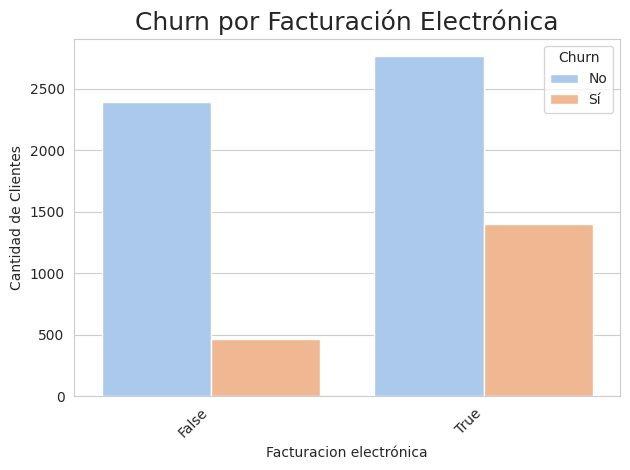

In [219]:
sns.countplot(data=df_final, x='PaperlessBilling', hue='Churn', palette='pastel')
plt.title('Churn por Facturación Electrónica', fontsize=18)
plt.xlabel('Facturacion electrónica')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

In [229]:
tabla_churn_paperless = pd.crosstab(df_final['PaperlessBilling'], df_final['Churn'], normalize='index') * 100
tabla_churn_paperless = tabla_churn_paperless.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_paperless

Churn,No_Churn (%),Churn (%)
PaperlessBilling,,
False,83.624302,16.375698
True,66.410749,33.589251


"Se observa que los clientes que utilizan facturación electrónica (PaperlessBilling = True) presentan una tasa de churn significativamente más alta que aquellos que reciben la factura en papel. Esto sugiere que la facturación electrónica podría estar asociada a un perfil de cliente más propenso a cancelar el servicio, posiblemente por ser más autónomos o menos comprometidos con la compañía."

<ul>
  <li>Churn por dependiente</li>

<ul>



In [227]:
df_final[['Churn', 'Dependents']].value_counts().reset_index(name='Cantidad')

,Churn,Dependents,Cantidad
0,False,False,3390
1,False,True,1773
2,True,False,1543
3,True,True,326


In [234]:
tabla_churn_dependents = pd.crosstab(df_final['Dependents'], df_final['Churn'], normalize='index') * 100
tabla_churn_dependents = tabla_churn_dependents.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_dependents

Churn,No_Churn (%),Churn (%)
Dependents,,
False,68.720860,31.279140
True,84.468795,15.531205


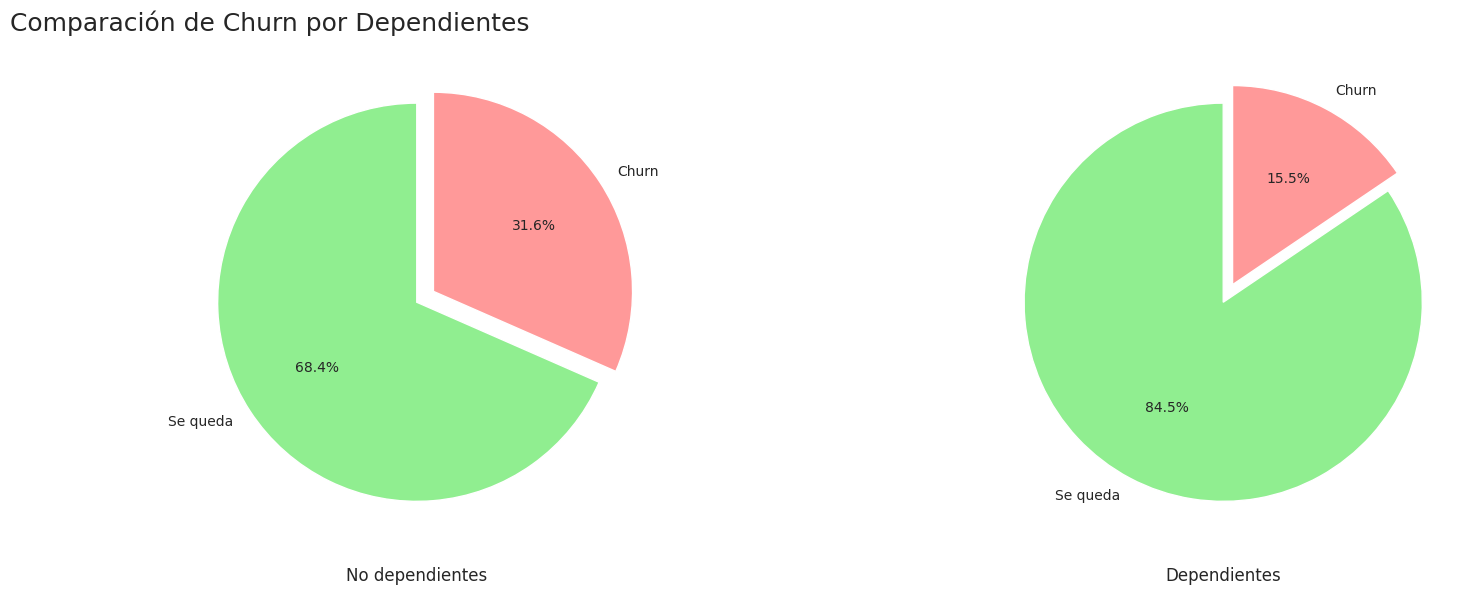

In [242]:
datos_2 = {
    'No dependientes': [68.72, 31.72],
    'Dependientes': [84.46, 15.53],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (dependientes, valores) in enumerate(datos_2.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{dependientes}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Dependientes', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

In [228]:
df_final[['Churn', 'Partner']].value_counts().reset_index(name='Cantidad')

,Churn,Partner,Cantidad
0,False,True,2724
1,False,False,2439
2,True,False,1200
3,True,True,669


In [235]:
tabla_churn_partner = pd.crosstab(df_final['Partner'], df_final['Churn'], normalize='index') * 100
tabla_churn_partner= tabla_churn_partner.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_partner

Churn,No_Churn (%),Churn (%)
Partner,,
False,67.023908,32.976092
True,80.282935,19.717065


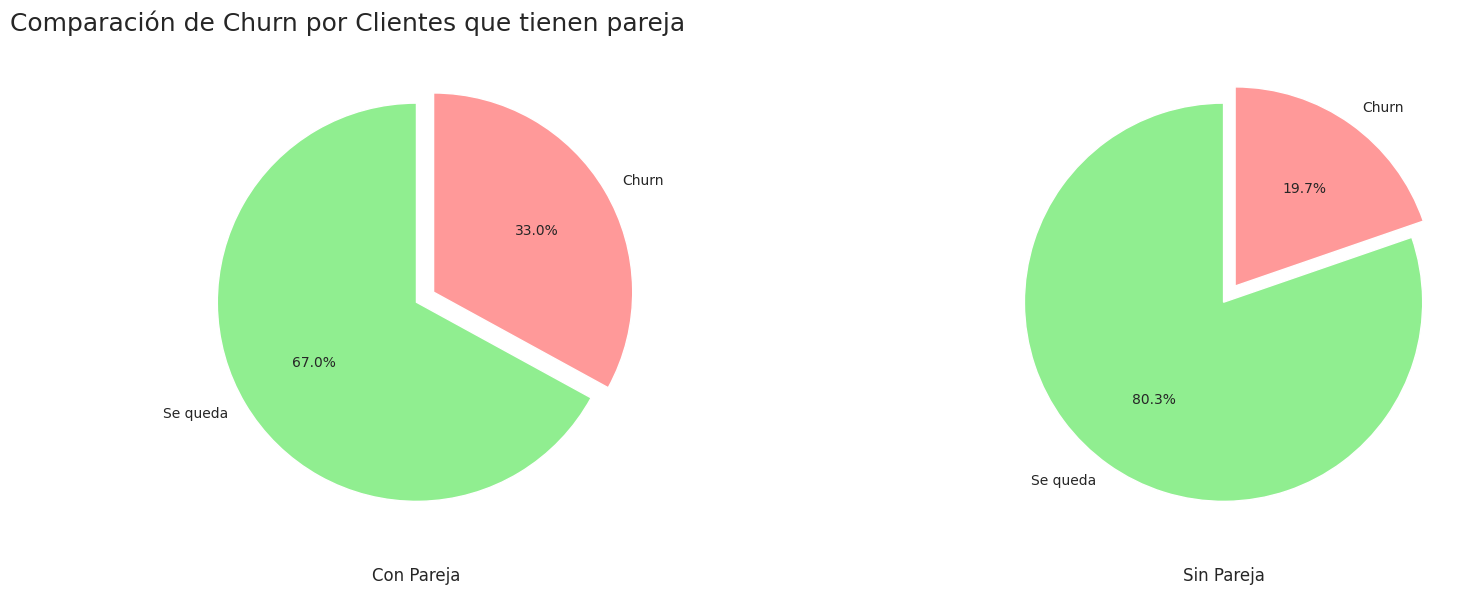

In [243]:
datos_3 = {
    'Con Pareja': [67.02, 32.97],
    'Sin Pareja': [80.28, 19.71],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (partner, valores) in enumerate(datos_3.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{partner}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Clientes que tienen pareja', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

In [258]:
df_final[['Churn', 'SeniorCitizen']].value_counts().reset_index(name='Cantidad')

,Churn,SeniorCitizen,Cantidad
0,False,False,4497
1,True,False,1393
2,False,True,666
3,True,True,476


In [247]:
tabla_churn_citizen = pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100
tabla_churn_citizen = tabla_churn_citizen.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_citizen

Churn,No_Churn (%),Churn (%)
SeniorCitizen,,
False,76.349745,23.650255
True,58.318739,41.681261


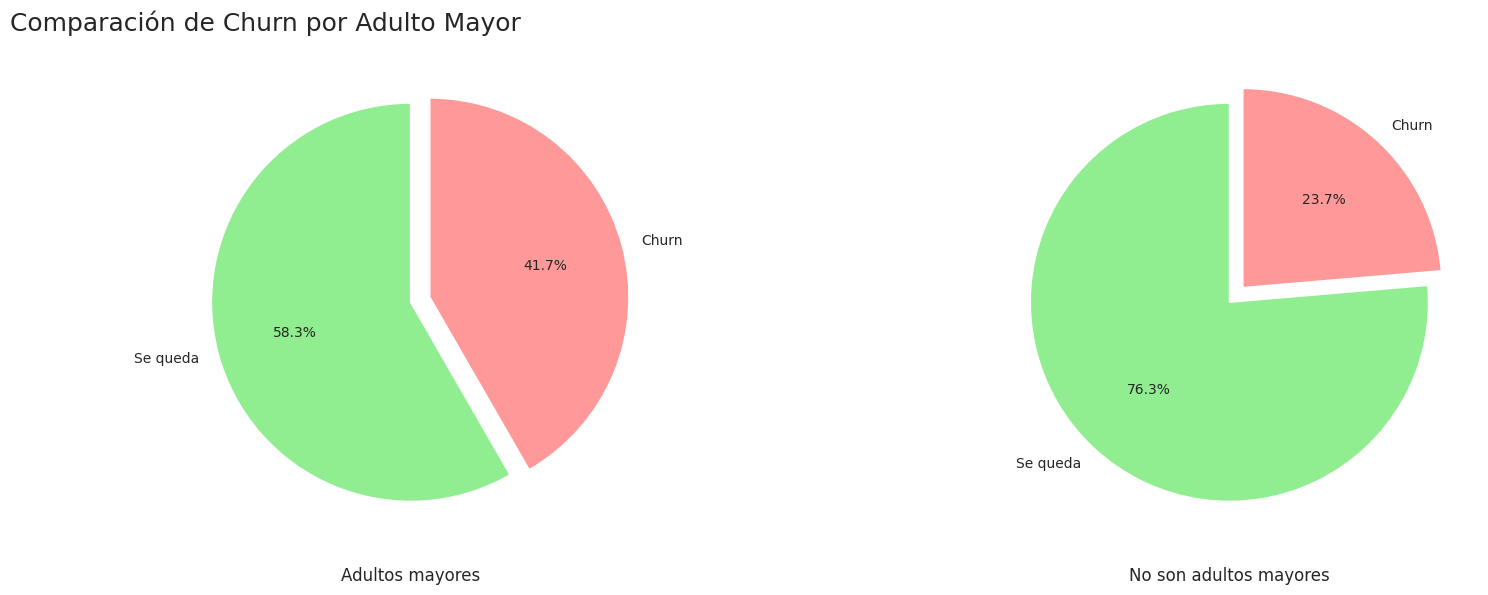

In [250]:
datos_4 = {
    'Adultos mayores': [58.31, 41.68],
    'No son adultos mayores': [76.34, 23.65],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (citizen, valores) in enumerate(datos_4.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{citizen}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Adulto Mayor', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

<p>
  Los clientes mayores (SeniorCitizen) presentan una tasa de evasión significativamente más alta que los clientes no mayores.
</p>

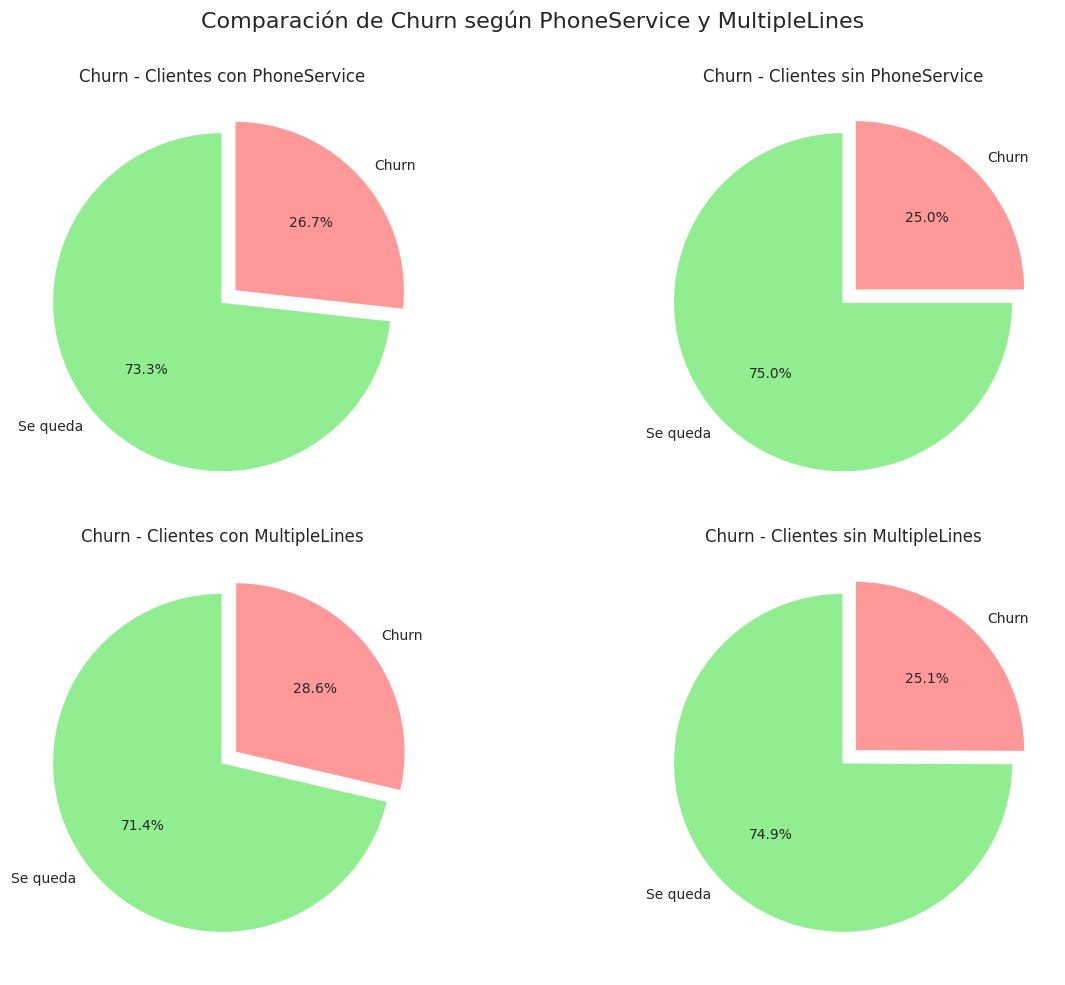

In [254]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# --- 1. PhoneService = True ---
subset1 = df_final[df_final['PhoneService'] == True]
counts1 = subset1['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[0].pie(counts1, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#90ee90', '#ff9999'], startangle=90, explode=[0, 0.1])
axs[0].set_title('Churn - Clientes con PhoneService')

# --- 2. PhoneService = False ---
subset2 = df_final[df_final['PhoneService'] == False]
counts2 = subset2['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[1].pie(counts2, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#90ee90', '#ff9999'], startangle=90, explode=[0, 0.1])
axs[1].set_title('Churn - Clientes sin PhoneService')

# --- 3. MultipleLines = True ---
subset3 = df_final[df_final['MultipleLines'] == True]
counts3 = subset3['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[2].pie(counts3, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#90ee90', '#ff9999'], startangle=90, explode=[0, 0.1])
axs[2].set_title('Churn - Clientes con MultipleLines')

# --- 4. MultipleLines = False ---
subset4 = df_final[df_final['MultipleLines'] == False]
counts4 = subset4['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[3].pie(counts4, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#90ee90', '#ff9999'], startangle=90, explode=[0, 0.1])
axs[3].set_title('Churn - Clientes sin MultipleLines')

plt.suptitle('Comparación de Churn según PhoneService y MultipleLines', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [260]:
df_final[['Churn', 'InternetService']].value_counts().reset_index(name='Cantidad')

,Churn,InternetService,Cantidad
0,False,DSL,1957
1,False,Fiber optic,1799
2,False,No,1407
3,True,Fiber optic,1297
4,True,DSL,459
5,True,No,113


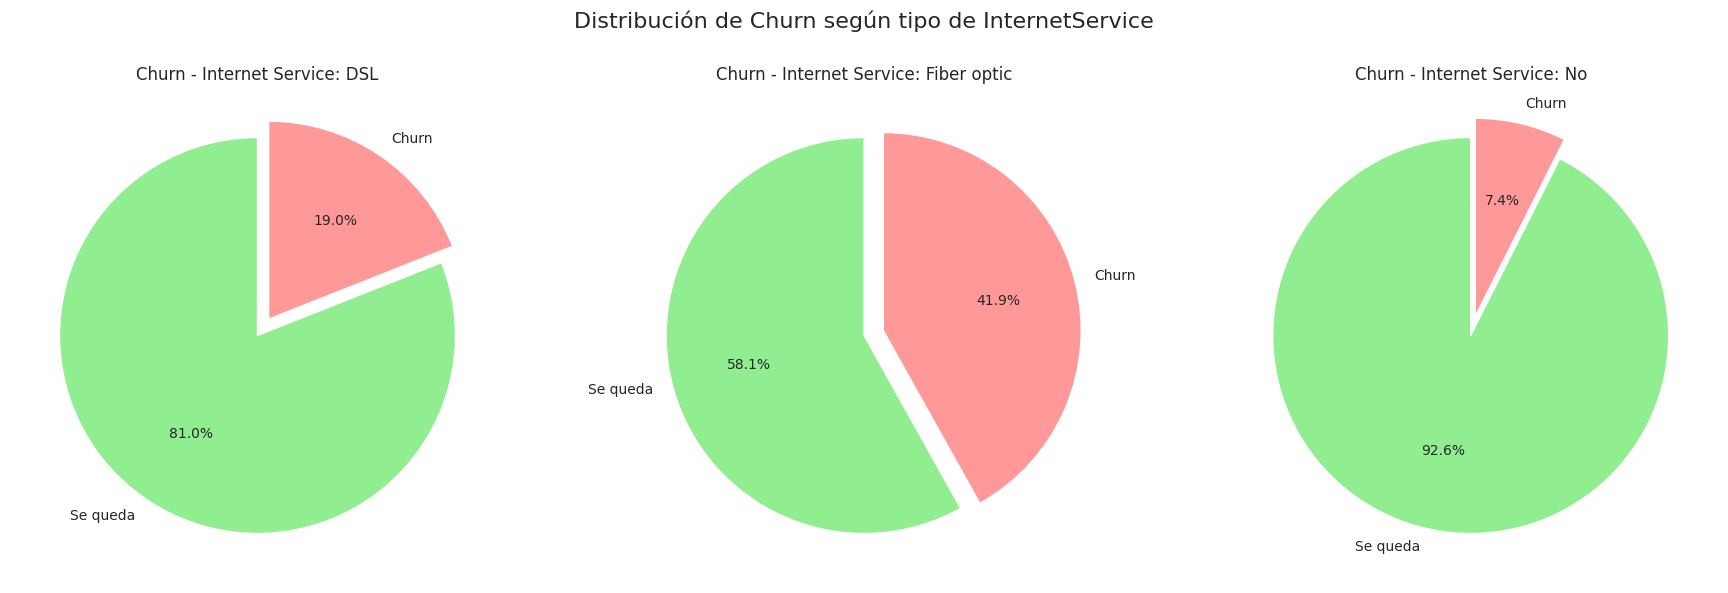

In [261]:
data = {
    'Churn': [False, False, False, True, True, True],
    'InternetService': ['DSL', 'Fiber optic', 'No', 'Fiber optic', 'DSL', 'No'],
    'Cantidad': [1957, 1799, 1407, 1297, 459, 113]
}

df_plot = pd.DataFrame(data)

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
servicios = ['DSL', 'Fiber optic', 'No']
colores = ['#90ee90', '#ff9999']  # Verde = no churn, rojo = churn
etiquetas = ['Se queda', 'Churn']

for i, servicio in enumerate(servicios):
    # Filtrar datos del servicio actual
    sub = df_plot[df_plot['InternetService'] == servicio]
    valores = sub.sort_values('Churn')['Cantidad'].values  # orden: [False, True]

    axs[i].pie(valores,
               labels=etiquetas,
               autopct='%1.1f%%',
               colors=colores,
               startangle=90,
               explode=[0, 0.1])
    axs[i].set_title(f'Churn - Internet Service: {servicio}')

plt.suptitle('Distribución de Churn según tipo de InternetService', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


<p>

  ¿Qué podemos observar?
  <ol>
    <li> En Fiber optic, suele haber mayor churn (¡casi 42% en la muestra!).</li>
    <li> En DSL, churn es más bajo.</li>
    <li>En quienes no tienen internet, el churn es mínimo (como era de esperarse, ya que no usan este servicio).</li>

  </ol>

</p>

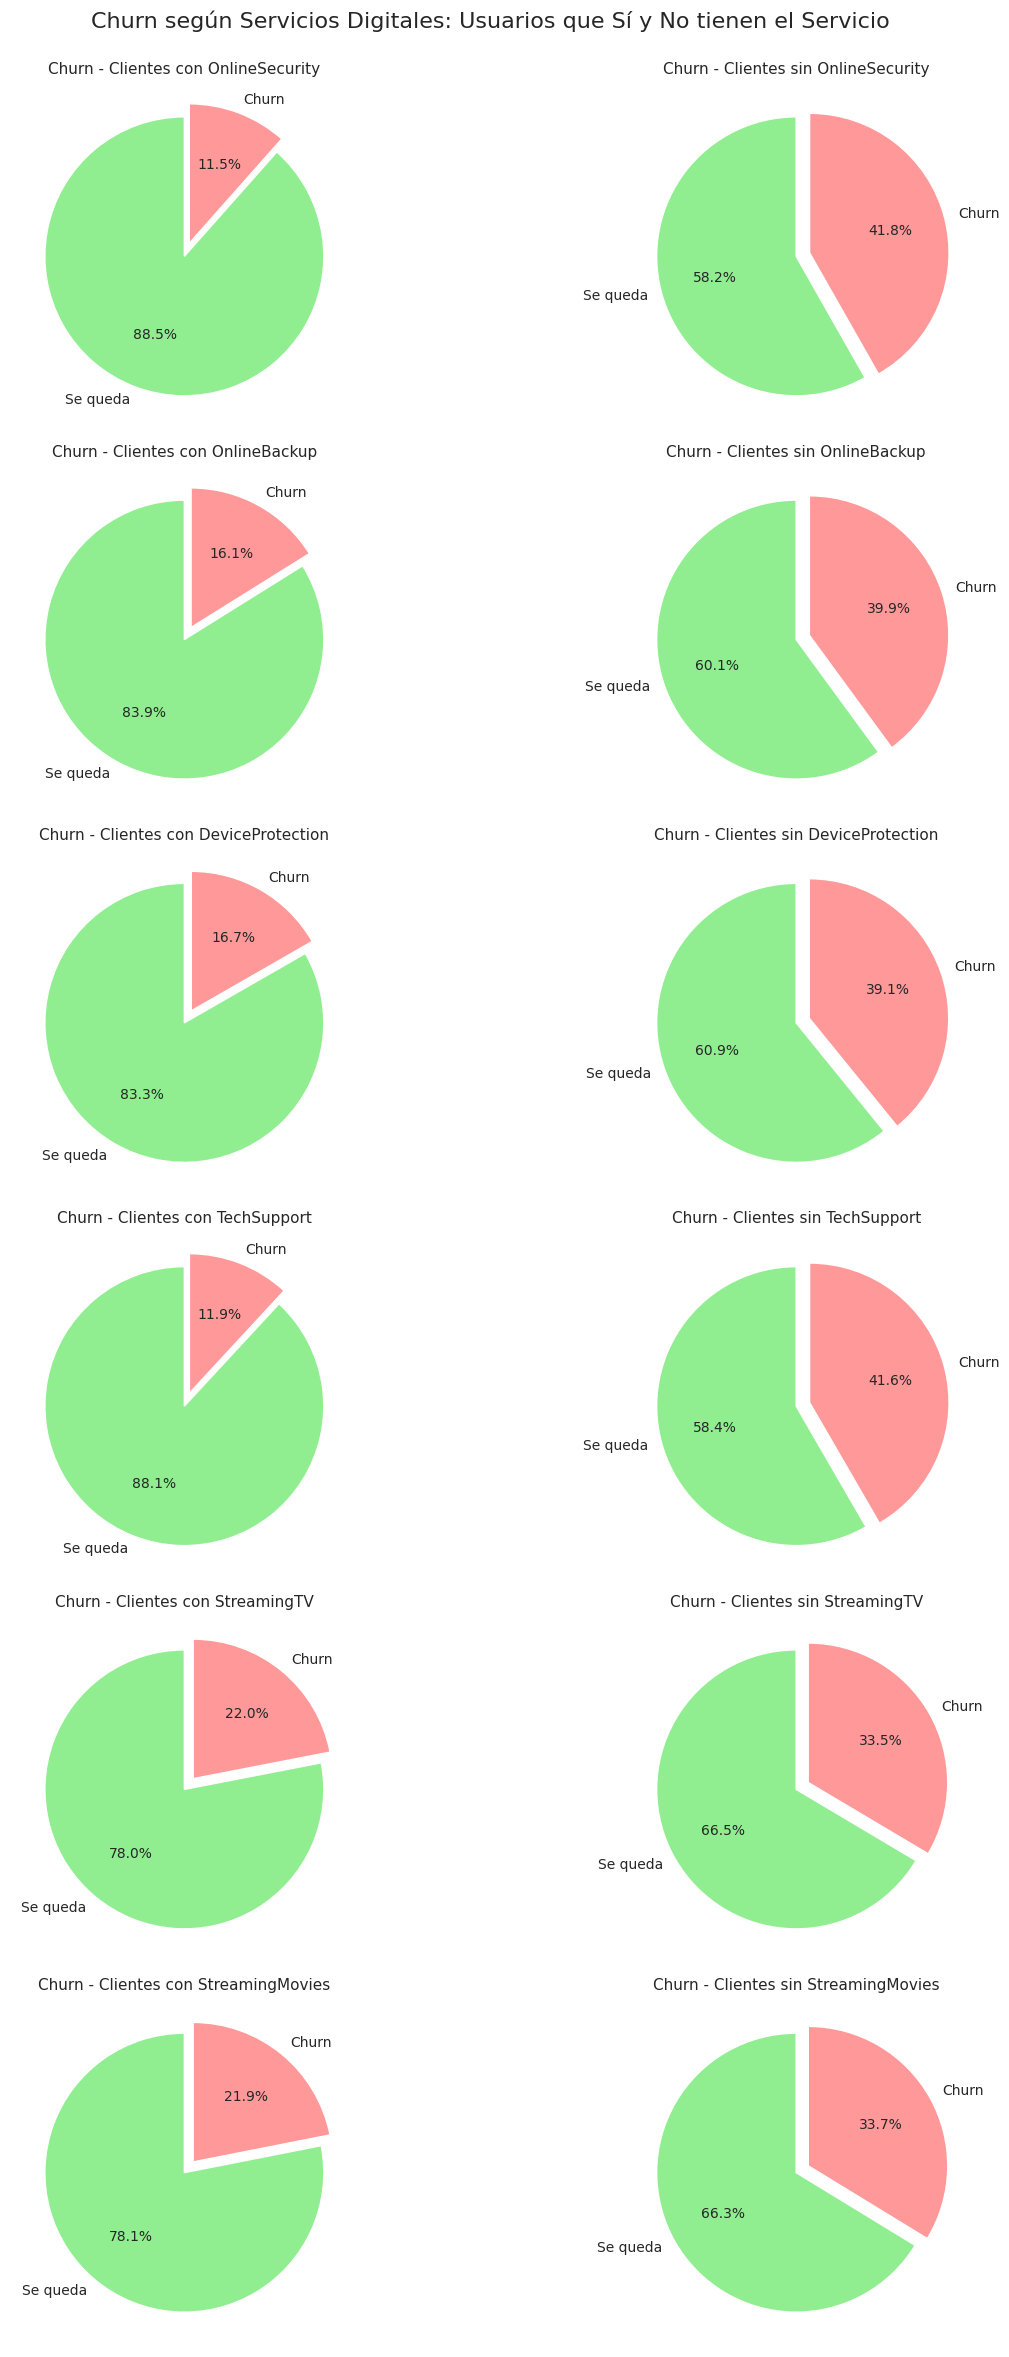

In [263]:
servicios = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

etiquetas = ['Se queda', 'Churn']
colores = ['#90ee90', '#ff9999']  # Verde y rojo

# Crear figura con 6 filas y 2 columnas (True y False por servicio)
fig, axs = plt.subplots(6, 2, figsize=(14, 24))
fig.subplots_adjust(top=0.95)
axs = axs.flatten()

for i, servicio in enumerate(servicios):
    for j, valor in enumerate([True, False]):
        # Filtrar los datos
        subset = df_final[df_final[servicio] == valor]
        counts = subset['Churn'].value_counts().reindex([False, True], fill_value=0)

        idx = i * 2 + j  # para posicionar el subplot

        axs[idx].pie(counts,
                     labels=etiquetas,
                     autopct='%1.1f%%',
                     colors=colores,
                     startangle=90,
                     explode=[0, 0.1])

        titulo_valor = "con" if valor else "sin"
        axs[idx].set_title(f'Churn - Clientes {titulo_valor} {servicio}', fontsize=11)

plt.suptitle('Churn según Servicios Digitales: Usuarios que Sí y No tienen el Servicio', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## **Conteo de evasión por variables numéricas**

<p>
  Explorar las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

  Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.
</p>

/tmp/ipython-input-265-607493298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


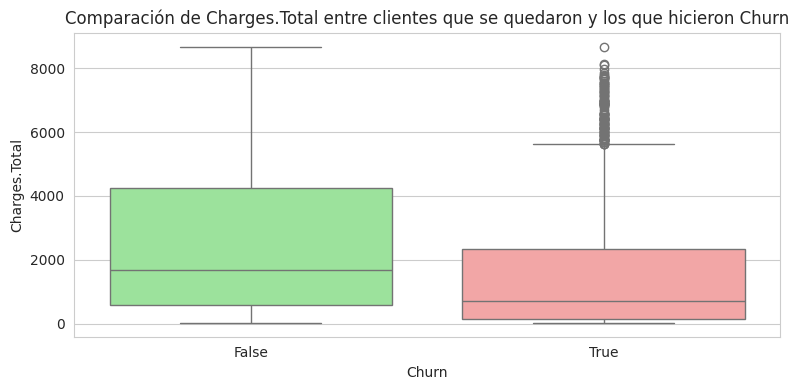

/tmp/ipython-input-265-607493298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


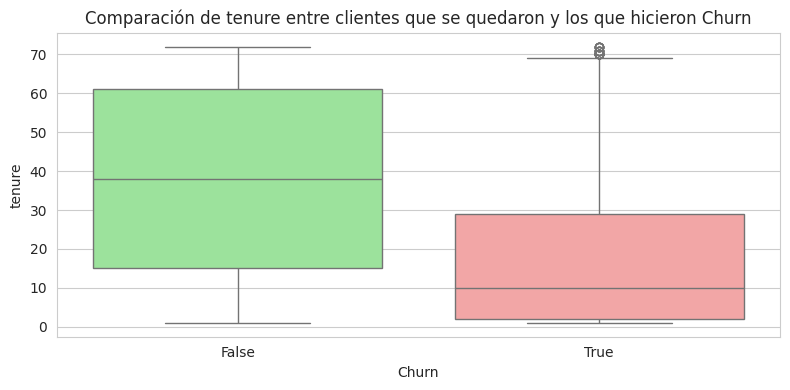

/tmp/ipython-input-265-607493298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


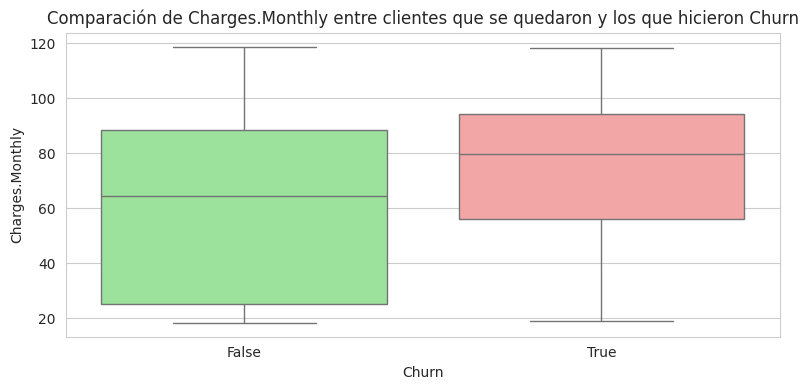

In [265]:
for var in numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])
    plt.title(f'Comparación de {var} entre clientes que se quedaron y los que hicieron Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-266-3264350805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


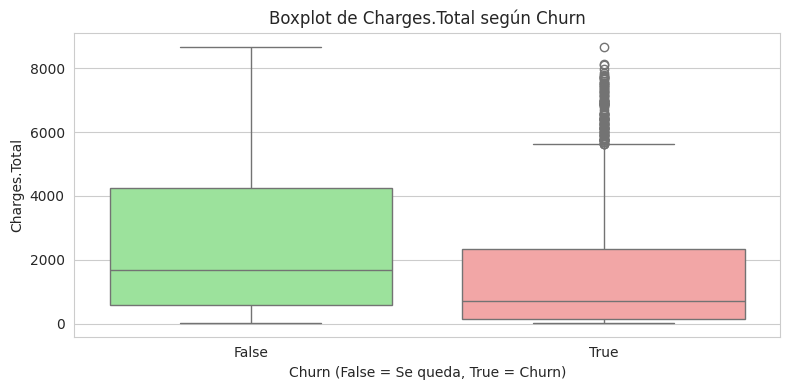

/tmp/ipython-input-266-3264350805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


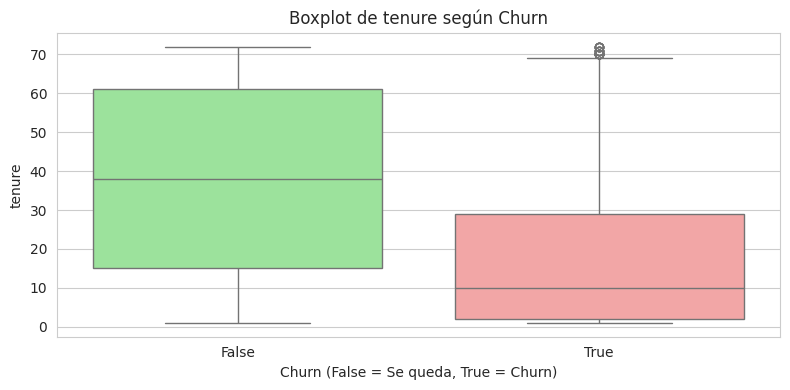

/tmp/ipython-input-266-3264350805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])


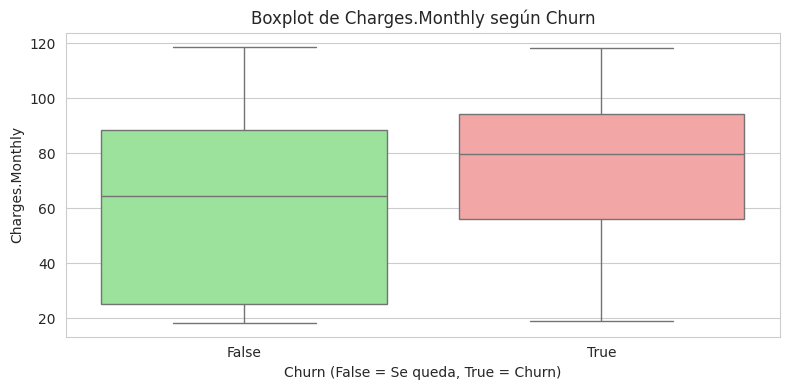

In [266]:

variables_numericas = ['Charges.Total', 'tenure', 'Charges.Monthly']

for var in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_final, x='Churn', y=var, palette=['#90ee90', '#ff9999'])
    plt.title(f'Boxplot de {var} según Churn')
    plt.xlabel('Churn (False = Se queda, True = Churn)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

## **Matriz de correlación para entender qué variables numéricas más influyen**



In [269]:
df_corr = df_final.copy()
df_corr['Churn'] = df_corr['Churn'].astype(int)

In [270]:
variables_numericas = df_corr.select_dtypes(include=['int64', 'float64', 'bool'])

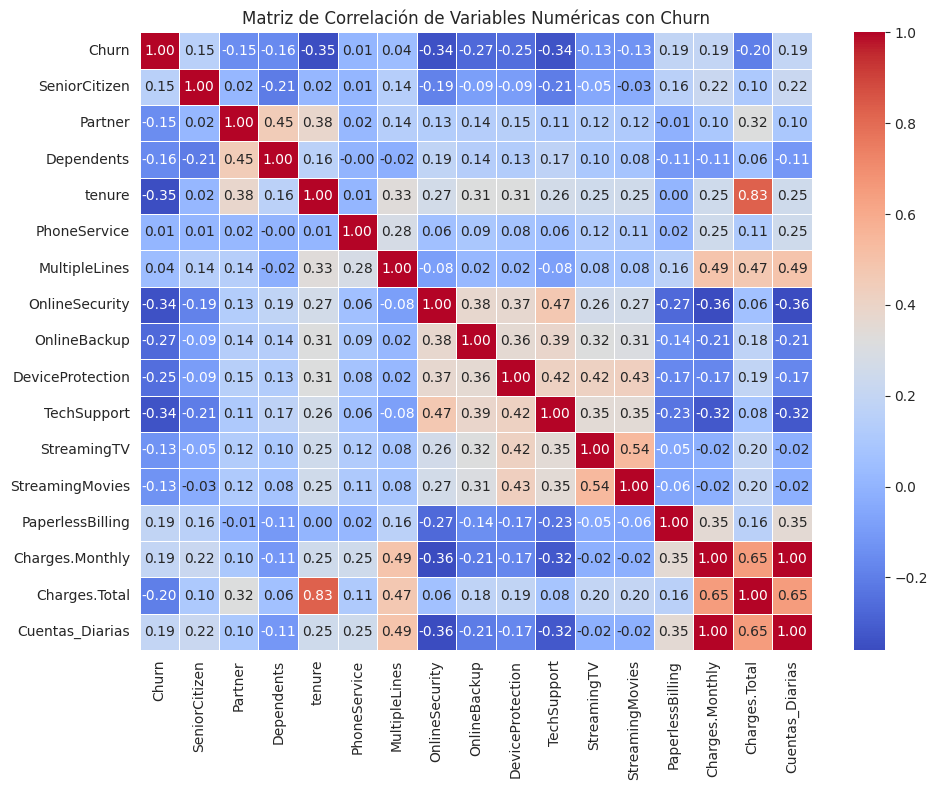

In [271]:
plt.figure(figsize=(10, 8))
correlaciones = variables_numericas.corr()

sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas con Churn')
plt.tight_layout()
plt.show()

# **Conclusiones e Insights**
Resumén de los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

## **1. Evasión general (Churn)**
  <ul>
    <li>Aproximadamente 26% de los clientes se dieron de baja.</li>
    <li>Es un porcentaje elevado que justifica intervenciones estratégicas.</li>
  </ul>

## **2. Perfil demográfico**
  <ul>
    <li> Género (Gender): no hay diferencias significativas entre hombres y mujeres respecto al churn.</li>
    <li> SeniorCitizen: los adultos mayores (SeniorCitizen = 1) tienen más probabilidad de cancelar.</li>
    <li> Dependents y Partner: los clientes con pareja o dependientes tienen menor tasa de evasión, lo que sugiere un vínculo más estable con el servicio.</li>
  </ul>

## **3. Servicios de telefonía e internet**
####**PhoneService y MultipleLines:**
  <ul>
    <li>Quienes no tienen línea telefónica o una sola línea tienden a quedarse más que quienes usan múltiples líneas.</li>
  </ul>

####**InternetService:**
   <ul>
    <li>Clientes con Fiber optic tienen la tasa de churn más alta (42%).</li>
    <li>Clientes sin internet tienen muy baja evasión.</li>
   </ul>

##**4. Servicios adicionales**


####**Servicios como OnlineSecurity, TechSupport, DeviceProtection, etc.:**
   <ul>
    <li>Clientes que no usan estos servicios tienen tasas de churn más altas.</li>
    <li>Es decir, mayor uso de servicios digitales = menor churn.</li>
   </ul>


##**5. Tipo de contrato**
  <ul>
    <li>Contratos mes a mes presentan la mayor tasa de churn (~43%).</li>
    <li>Contratos a 1 o 2 años muestran muchísima menor evasión, lo que sugiere que el compromiso reduce cancelaciones.</li>
  </ul>


##**6. Método de pago y facturación**

  <ul>
    <li>Clientes con facturación electrónica (PaperlessBilling) tienen mayor tasa de churn.</li>
    <li>Algunos métodos de pago (como tarjeta de crédito) están más asociados a la permanencia.</li>
   </ul>
    
    
##**7. Variables numéricas**

  <ul>
    <li>tenure (tiempo como cliente): es el factor más fuerte contra el churn. Cuanto más tiempo lleva un cliente, menos probabilidad tiene de irse.</li>
    <li>Charges.Total: correlación negativa → clientes que han gastado más tienden a quedarse.</li>
    <li>Charges.Monthly: correlación levemente positiva → los planes más costosos tienen un poco más de evasión.</li>
  <ul>
  
##**Insight clave**
<p>
  El churn no se explica por una sola variable, sino por una combinación de perfil demográfico, tipo de contrato y uso de servicios adicionales. Clientes nuevos, sin dependientes, sin servicios digitales contratados, y con contratos flexibles, son el grupo más propenso a cancelar.
</p>